##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/gemini-2/get_started.ipynb"><img src="https://ai.google.dev/site-assets/images/docs/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
!pip install -U -q google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 24.4 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

This notebook will teach you how to use the [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model with the GenAI SDK. But the SDK also work with the 1.5 generation of models.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [ ]:
MODEL_ID = "gemini-2.0-flash-exp" # @param ["gemini-1.5-flash-8b","gemini-1.5-flash-002","gemini-1.5-pro-002","gemini-2.0-flash-exp"] {"allow-input":true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.



## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In [ ]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

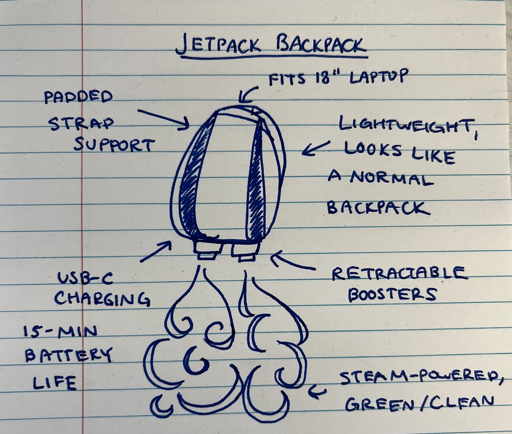

Okay, here's a short and engaging blog post based on the image, keeping in mind the casual and imaginative tone:

**Forget Traffic! Introducing the Jetpack Backpack!**

Okay, so maybe flying cars are still a ways off, but what if I told you that personal, on-demand flight was closer than you think? And what if that flight came in the form of... a backpack? 

Feast your eyes on the concept for the *Jetpack Backpack*! This isn't your average Jansport, folks. This bad boy is designed to fit an 18" laptop, keeping your tech secure while also preparing you for your escape from the mundane. Forget the crowded subway or that eternal parking search - imagine just popping on your backpack, and *whoosh*!  

Now, I know what you’re thinking: “Jetpacks are bulky and impractical!” Well, not this one. This sleek design is meant to be **lightweight** and, get this, it **looks like a normal backpack**! No need to look like you're prepping for a sci-fi convention just to get to the coffee shop.

But the magic is in the details. Check it:

*   **Padded straps**: Comfort is key, even when soaring through the sky.
*   **Retractable Boosters**: Discreetly stowed when you don’t need them.
*   **USB-C Charging**: Because what jetpack wouldn’t need modern tech?
*   **Steam-Powered, Green/Clean**: Yes, you read that right! Eco-friendly flying! 
*   **15-Minute Battery Life**: Okay, so maybe you can't cross the continent just yet, but 15 minutes should be enough for a quick commute or a speedy coffee run.

This isn't just a flight of fancy (pun totally intended). It’s a glimpse into a future where getting around is easier, more sustainable, and a whole lot more fun.  Who needs a driver's license when you can just take to the skies? The Jetpack Backpack - making commute envy a thing of the past! 

What do you think? Ready for a spin? Let me know in the comments below!


In [ ]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

Okay, okay, little squeaky friend! Let's talk about the internet, but in puppy terms!

Imagine a HUGE, GIGANTIC yard, bigger than any yard you've ever seen! This yard is full of squeaky toys, but they're not all in one place. They're scattered all over, some near the big tree, some by the flower bushes, some even under the porch!

This yard is the internet!

Now, you, my sweet


## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [ ]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Okay, here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  **"Oh, real mature, Universe. Real freakin' mature. Just gonna leave that obstacle there for me, are ya? Nice."** (This uses sarcasm and mocks the universe as if it were a childish prankster.)

2.  **"Alright, Universe, you win! I'm officially impressed by your sheer lack of consideration. You've outdone yourself today, you magnificent, toe-stubbing jerk."** (This uses over-the-top praise dripping with sarcasm to highlight the annoyance and make the universe seem deliberately cruel).


## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [ ]:
system_instruction="""
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
        temperature=0.5,
    ),
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  if year % 4 != 0:
    return False
  elif year % 100 == 0:
    if year % 400 == 0:
      return True
    else:
      return False
  else:
    return True

# Example Usage
print(is_leap_year(2024))  # Output: True
print(is_leap_year(2023))  # Output: False
print(is_leap_year(1900))  # Output: False
print(is_leap_year(2000))  # Output: True
```

**Explanation:**

1. **Function Definition:**
   - The code defines a function called `is_leap_year` that takes one argument: `year` (an integer representing the year).

2. **Leap Year Rules:**
   - The function implements the rules for determining a leap year:
     - **Rule 1:** If the year is divisible by 4, it's potentially a leap year.
     - **Rule 2:** If the year is divisible by 100, it's NOT a leap year, *unless* it's also divisible by 400.

3. **Implementation:**
   - **`if year % 4 != 0:`**: This checks if the year is NOT divisible by 4. If it's not, it's definitely not a leap year, so `False` is returned immediately.
   - **`elif year % 100 == 0:`**: This checks if the year is divisible by 100. If it is, it proceeds to the next check.
     - **`if year % 400 == 0:`**: This checks if the year is also divisible by 400. If it is, it's a leap year, so `True` is returned.
     - **`else:`**: If the year is divisible by 100 but not by 400, it's not a leap year, so `False` is returned.
   - **`else:`**: If the year is divisible by 4 but not by 100, it's a leap year, so `True` is returned.

4. **Example Usage:**
   - The code includes example calls to the `is_leap_year` function with different years and prints the results, demonstrating how to use the function.

**How the code handles the leap year rules:**

- The code efficiently handles the exception for years divisible by 100 by checking for divisibility by 400.
- The logic is clear and easy to follow, making it maintainable and understandable.

This function provides a reliable way to determine if a given year is a leap year according to the Gregorian calendar rules.


In [ ]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

```python
import unittest
from your_module import is_leap_year  # Replace 'your_module' with the actual module name

class TestLeapYear(unittest.TestCase):

    def test_leap_years(self):
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(1600))
        self.assertTrue(is_leap_year(2020))
        self.assertTrue(is_leap_year(4))

    def test_non_leap_years(self):
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(2100))
        self.assertFalse(is_leap_year(2021))
        self.assertFalse(is_leap_year(5))

    def test_edge_cases(self):
        self.assertTrue(is_leap_year(400))
        self.assertFalse(is_leap_year(100))
        self.assertFalse(is_leap_year(1))
        self.assertFalse(is_leap_year(2))
        self.assertFalse(is_leap_year(3))
    
    def test_zero(self):
        self.assertTrue(is_leap_year(0))

if __name__ == '__main__':
    unittest.main()
```

**Explanation:**

1.  **Import necessary modules:**
    *   `unittest`: This is the Python standard library module for writing unit tests.
    *   `from your_module import is_leap_year`:  **Important:** Replace `your_module` with the actual name of the Python file where your `is_leap_year` function is defined. This line imports the function you want to test.

2.  **Create a test class:**
    *   `class TestLeapYear(unittest.TestCase):` defines a test class that inherits from `unittest.TestCase`. This class will contain your test methods.

3.  **Test methods:**
    *   Each method within the test class that starts with `test_` is considered a test case.
    *   **`test_leap_years(self)`**: This method tests cases where the year should be a leap year.
        *   `self.assertTrue(is_leap_year(year))`: This assertion checks if the `is_leap_year` function returns `True` for the given `year`. If it doesn't, the test will fail.
    *   **`test_non_leap_years(self)`**: This method tests cases where the year should *not* be a leap year.
        *   `self.assertFalse(is_leap_year(year))`: This assertion checks if the `is_leap_year` function returns `False` for the given `year`.
    *   **`test_edge_cases(self)`**: This method tests edge cases, including years divisible by 100 and 400, and small numbers.
    *   **`test_zero(self)`**: This method tests the edge case of year 0.

4.  **Assertions:**
    *   The `unittest` framework provides several assertion methods (like `assertTrue` and `assertFalse`) that you use to verify that the actual output of your code matches the expected output.

5.  **Running the tests:**
    *   `if __name__ == '__main__': unittest.main()`: This block ensures that the tests are executed when you run the Python file directly.

**How to use the unit test:**

1.  **Save the code:** Save the test code in a Python file (e.g., `test_leap_year.py`).
2.  **Make sure the function is in a separate file:** Save the `is_leap_year` function in a separate file (e.g., `leap_year_module.py`).
3.  **Run the tests:** Open a terminal or command prompt, navigate to the directory where you saved the files, and run the test file using:

    ```bash
    python -m unittest test_leap_year.py
    ```

    The output will show you if all tests passed or if any tests failed.

**Key points:**

*   **Comprehensive testing:** The tests cover various scenarios, including leap years, non-leap years, edge cases, and zero.
*   **Clear test names:** The test method names clearly indicate what they are testing.
*   **Easy to extend:** You can easily add more test cases to cover other scenarios if needed.
*   **Automated testing:** Unit tests allow you to automate the process of testing your code, which is crucial for maintaining code quality and catching bugs early.


## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [ ]:
from pydantic import BaseModel

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

Markdown(response.text)

 {"recipe_description": "Classic chocolate chip cookies with a soft, chewy center and slightly crispy edges. A family favorite that's easy to make and always a crowd-pleaser.", "recipe_ingredients": ["1 cup (2 sticks) unsalted butter, softened", "3/4 cup granulated sugar", "3/4 cup packed brown sugar", "2 teaspoons pure vanilla extract", "2 large eggs", "2 1/4 cups all-purpose flour", "1 teaspoon baking soda", "1 teaspoon salt", "2 cups chocolate chips"], "recipe_name": "Chocolate Chip Cookies"}

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit
*****************
 734, or "Dusty" as the maintenance crew had once
*****************
 jokingly called him, was a cleaning bot. He was designed for the vast,
*****************
 echoing corridors of the abandoned research facility, meticulously polishing the floor, erasing any lingering traces of the scientists who had long since departed. Dusty, however, yearned
*****************
 for more.

He wasn't programmed for companionship, his algorithms focused on dust particle analysis and efficient floor coverage. But as the years ticked by, the
*****************
 silence became a weight, heavier than the polishing fluid he carried. He observed the shadows dancing on the walls, the dust motes twirling in the faint light filtering through the grimy windows, and wondered if there was more to existence than
*****************
 the endless cycle of cleaning.

One particularly dreary cycle, Dusty found himself drawn to the old, overgrown laboratory at the far end of the facility.  Broken equi

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
Nutsy was a squirrel, not quite ordinary
With a twitchy nose and fur so very hairy
He didn’t just bury acorns in the ground, you see
He had a time machine, a little acorn tree!
Hidden deep within his hollow, carved with care
A clockwork mechanism, beyond compare
He’d spin the tiny dial, with eyes so bright
And vanish in a flash, into the day or night!

(Chorus)
Oh, Nutsy the time-traveling squirrel, he zooms through history
From dinosaurs to spaceships, a furry mystery
He nibbles on the past, and scurries through the future’s gleam
A whirlwind of adventure, a fantastical dream!

(Verse 2)
He landed in the Roman Colosseum, chaos all around
Trying to bury acorns, on hallowed, battle ground
A gladiator nearly tripped, a chariot veered so fast
Nutsy barely dodged it, his time-trip nearly past!
Then he jumped to Egypt, pyramids so grand
He climbed atop a sphinx, with an acorn in his hand
He tried to plant a sapling, beneath the desert sun
But got shooed away by a Pharaoh, feeling outrun!

(Chorus)
Oh, Nutsy the time-traveling squirrel, he zooms through history
From dinosaurs to spaceships, a furry mystery
He nibbles on the past, and scurries through the future’s gleam
A whirlwind of adventure, a fantastical dream!

(Bridge)
He saw the Wright brothers, take their flight so high
He even met a Viking, beneath a stormy sky
He tried to give a dinosaur an acorn, just to see
If they’d be friends, but they just roared, “LEAVE ME BE!”
He learned so much about the world, from times both old and new
But often found that nuts were always something to pursue!

(Verse 3)
He visited the future, robots zoomed and beeped
He saw flying cars, and people fast asleep
He tried to plant his acorns, in the silver, shiny streets
But they just bounced and rattled, without any tree retreats
He spun the dial back home, with stories to unfold
Of all the sights he’d witnessed, both brave and brave and bold
Back to his hollow tree, where he can rest his head
The time-traveling squirrel, now snuggled in his bed.

(Chorus)
Oh, Nutsy the time-traveling squirrel, he zooms through history
From dinosaurs to spaceships, a furry mystery
He nibbles on the past, and scurries through the future’s gleam
A whirlwind of adventure, a fantastical dream!

(Outro)
So if you see a squirrel, with a glint within his eye
Don't be surprised, he might be from another time, way up high
And if you find an acorn, in a place that's very strange
Just remember Nutsy, the time-traveling, furry exchange!
Yeah, remember Nutsy, the time-traveling squirrel, so grand!
He's hopping through the ages, with an acorn in his hand!


## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(args={'destination': 'Paris'}, name='get_destination')

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(path=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=file_upload.uri,
                    mime_type=file_upload.mime_type),
                ]),
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

Okay, here's a short and engaging blog post based on the provided image:

**Forget Flying Cars, We’ve Got Jetpack Backpacks!**

Okay, maybe not *quite* yet. But imagine a world where your morning commute didn’t involve traffic, or cramped public transport. Thanks to this awesome concept sketched out on good old-fashioned lined paper, we might not be so far away from flying to work. 

Feast your eyes on the **Jetpack Backpack**! This isn't your typical school bag. This is a backpack with serious attitude, boasting:

*   **Sleek Disguise:** It looks like a normal backpack, so you can blend in with the crowd before taking flight.
*   **Laptop Friendly:** Fits an 18” laptop, because who flies without their tech?
*   **Padded Comfort:** Features padded straps for that extra dose of comfort, even if you're soaring.
*   **Boosters at the Ready:** Retractable boosters mean you’re prepped for lift off at a moment's notice.
*   **USB-C Charging:** Because what is modern tech without USB-C?
*   **15 Minute Flight Time:** A 15-minute battery life might not take you cross-country, but hey, you can pop across town.
*   **Green Power:** It’s steam-powered, making it a clean, sustainable solution to everyday transport.

This isn’t just some far-fetched fantasy. It's a peek into what could be the next step in personal mobility! The idea of strapping on a backpack and zooming off like something out of a sci-fi flick has always been alluring. So, are you ready for the future of commuting? Because this Jetpack Backpack is getting us one step closer!

What do you think? Would you rock a steam-powered backpack jet? Let us know in the comments!


### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(path=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=file_upload.uri,
                    mime_type=file_upload.mime_type),
                ]),
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This document is a transcription of the air-to-ground voice communications from the Apollo 11 mission, primarily between the astronauts and Mission Control in Houston, with some interactions with remote sites, recovery forces, and the USS Hornet. It spans from the launch of the Saturn V rocket to the splashdown in the Pacific Ocean, and includes:

**Launch and Initial Orbit:**

*   The launch phase, including roll program, staging, skirt separation, tower separation, and confirmation of thrust.
*   The achievement of a stable initial orbit (101.4 by 103.6 miles) and confirmation that the booster is safe.
*   Early communications through various ground stations and remote sites like Mila, Canary, and Vanguard.
*   Confirmation of the S-IVB's ability to perform the translunar injection burn (COI).
*   Discussions about the clarity of communications and the beautiful view of Earth from space.
*   Initial steps of insertion checklist and P52 alignment.

**Translunar Injection (TLI) and Beyond:**

*   Preparation for TLI, including a review of PAD (Pre-Abort Data) messages and the arming of pyro systems.
*   Successful TLI burn and confirmation of the trajectory.
*   Transposition and docking with the LM, the lunar module, which was initially not audible.
*   RCS (Reaction Control System) hot fire checks and activation of sequence logic.
*   The crew reports on a quad Bravo temperature problem after separation.
*   Pressurization of the LM, including discussion of pressure readings.
*   Discussion of RCS usage which was initially lower than nominal.
*   Separation of the LM from the CSM (Command Service Module) and the deployment of solar wind collector.
*   State vector updates and plans for an evasive maneuver.
*  Initial problem with FM downlink of the TV signal.

**Mid-Flight and Activities:**

*   Ongoing adjustments to the spacecraft configuration, including CRY0 switches.
*   Observation of the S-IVB slingshot maneuver.
*   A request for a nonpropulsive vent on the booster with the observation of a visual haze and particles moving away from the booster.
*   LM latch check and preparations for LM ejection.
*   The crew prepares and calibrates the onboard optics (P23), facing challenges with non-symmetrical horizons and the reticle alignment. They make numerous NOUN 49 measurements and discuss inconsistencies with the sextant readings and programmed attitudes with Houston.
*   P52 star alignment and optical calibration.
*   Several PAD read-backs and confirmations for trajectory corrections, including TLI-plus-90, TLI plus 5, and TLI PAD.
*   Discussion of using RCS quads and the cycling of switches.
*   The importance of using a parallel reticle to the horizon for accurate measurements is stressed during P23.
*  A waste-water dump down to 5% remaining is performed.

**Trans Earth Injection (TEI) and Return:**

*   Midcourse corrections are reviewed and one is ultimately cancelled.
*   Battery charging and switch configurations are managed to even the load on fuel cells.
*   Extensive discussion and troubleshooting around the O2 flow transducer, and a request to switch to a different star on optical calibration.
*   The crew receives an updated attitude for slingshot observation, LOX dump start and stop times are passed up.
*   A TLI-plus-11 hour PAD is read and a turn up of the S band is requested for the Honeysuckle Pass.
*   TV transmission test, successful and beautiful picture of Earth, followed by a camera zoom in for a close-up view.
*   The crew expresses happiness with the Saturn rocket and the ride it provided.
*   A state vector update is received and a request for extending the docking probe and RCS hot fire checks are requested.
*   Confirmation of probe extension, thruster firings (all axes), and readiness for sequence logic ON.
*   A new TLI PAD is sent and read back; discussion of a quad Bravo temperature concern and an off switch, verification that it is now "primary."
*   TLI ignition and confirmation; the Saturn provides a "magnificent ride."
*   The team shifts stations, confirms that pyros A are armed and pyros B are not. Later, both pyros are armed.
*   SEP (Separation) is complete and propellant B went with secondary.
*   Crew reports they are unable to hear the separation and that they moved the switch to the open position.
*   They confirm docking. They discuss probe extension and ready to go with hot fires, and do so.
*   Transposition and docking were good with the exception of using more gas than usual due to an overshooting problem.
*  Pressurization of the LM; issue with the LM/CSM pressure equalization - low, and the re-press package valve is momentarily activated to fill the bottles partially.
*  12 latches are confirmed locked after docking.
*  The state vector is good in the LM slots, and an evasive maneuver PAD is read.
*   Confirmation of a low temperature on the Service Module's RCS quad Bravo.
*   Confirmation of 99% chance of guidance cut-off on the launch vehicle.
*   A minute of usable TV picture was received by MILA.
*   Tananarive communication problems.
*   Confirmation to go for TLI.
*   A radio check through ARIA.
*   TLI ignition is confirmed and the thrust is good. Confirmation of cut-off, and NOUN 62 numbers, and a VI of 35579 and the EMS + 3.3.
*   Maneuver to separation attitude.
*   Confirmation of a good cut-off of SIV-B stage.
*   Confirmation that PYRO bus B is armed and authorization for separation.
*   SEP is confirmed, and a primary and secondary propellant B went ...
*    Docking is confirmed.

**The Landing (and post landing):**

*   The crew discusses a problem with the secondary propellant talkbacks on quad Bravo, which is resolved.
*   Detailed discussion of the transposition and docking procedures, including some issues with pitch rate and drift.
*   LM pressurization is discussed.
*   Discussion of a non-propulsive vent on the booster.
*  Confirmation of 12 latches locked and an evasive maneuver PAD.
*   LM separation complete, with a CRYO PRESS light.
*   O2 fans are turned on manually, and heaters are set to automatic.
*   A state vector update is performed.
*   A TLI PAD is read, including roll for SEP, and TLI 10-minute abort pitch.
*   Booster telemetry confirms that it looks good.
*   Ignition is confirmed; the crew expresses it's a "magnificent ride" with all three stages of the Saturn V.
*  Trajectory and guidance are good, and the crew reports a good, nominal cut-off.
*   Maneuver to observe slingshot, and a Lox dump is initiated and terminated.
*   Trunnion bias is set to zero and recommended O2 switch settings are provided to balance tanks.
*   Crew eats sandwiches and discuss views.
*   The crew offers birthday greetings to Dr. George Mueller.
*   They are asked to get a waste water dump to 5 percent remaining.
*    A TLI-plus-11 hour PAD is read.
*    Optical calibration is reviewed and updated.
*    The White Team comes on for the first shift.
*    Midcourse correction one is scrubbed.
*    A large gimbal angle is reported.
*    A CRY0 pressure light and MASTER alarm is reported due to low limit. O2 fan is turned on for tank 2.
*    A new NOUN 49 is requested because the DELTA R is quite large and it looks like the star is missing the substellar point.

**Optics and Navigation Challenges:**

*   Challenges with P23 auto maneuvers, including issues with the reticle not being parallel to the horizon and the inability to see stars.
*  They decide to accept the NOUN 49 display even though it is a large one.
*  Mike is having trouble finding that substellar point with accurate reticle alignment and that the AUTO maneuvers were not going to that location.
*  Star 40 disappears; they move on to star 44.
*  They have trouble seeing star 44, and are recommended to go to star 45 instead.
*  They are given three gimbal angles for star 45.
*  The crew reports that the reticle is off a good 30 degrees in roll.
*  They check if AUTO optics is selected, it is.
*  They trim up the attitude and continue to mark and get values for NOUN 49, and accept it.
*  They are asked to perform 2 more marks on star 45, and then they go back to star number 2.
*   The crew attempts to reconcile their observations with the ground computer values for the sextant.
*   They decide to reject the NOUN 49 and try it again.
*  They are given new angles for star number 2; they still report misalignment in roll.
*  Procedures personnel say reticle does not have to be parallel. The crew are not at the substellar point.
*   They are asked to accept NOUN 49, and give two more marks.
*   The crew questions why P23 is not going to the substellar point.
*   A REFSMMAT for PTC is uplinked; they transition back to BLOCK.
*   They perform a P52, option 1 preferred, and establish a PTC at 12 hours.
*   The platform drift is difficult to check.

**Late Flight and Preparation for Earth Re-Entry:**

*   They attempt to do a P52 option 1, the attitude is very bad for COMM.
*   They pitch down to get better COMM attitude, and then start the P52 option 1.
*  They are finally told to torque the NOUN 93.
*   They get a verified third star and the AUTO optics are pointing at it pretty close.
*   They select quads alfa and delta to establish PTC.
*   The crew checks their ATTITUDE SET switch is in GDC.
*   They start a PTC and wait for dampening.
*   The crew request to delay PTC and get some TV of a 7/8 Earth.
*   They are told to turn up S band for the Honeysuckle pass and also try a TV transmission.
*  The White Team comes on shift and is ready to be of service.
*   The team decides to scrub midcourse 1, and a large middle gimbal angle is reported.
*  The crew recall a program for optics calibrations. A CRYO light and MASTER ALARM comes on as the limits are reached, a fan is turned on.
*  They are asked to reject a NOUN 49 and try again.
*  They are asked to accept and then reject another NOUN 49.
*   They report that battery B is to be charged until sleep period and a deletion of the charge on battery A.
*   They report that the auto optics maneuvers are not going to substellar point and request angles for star.
*   They are given three angles, but those too, are not near the substellar point.
*   After running the angles again and getting the same result, they decide to continue on with the readings.
*   They receive new angles for star 45.
*    They report that their reticle is off 30 degrees in roll.
*    They confirm AUTO optics is selected.
*    They are requested to PROCEED to get the sextant pointed to the star.
*    Shaft and trunnion angles were computed correctly from the ground.
*   After two good marks they are asked to proceed with Star 44.
*   Star 44 is not bright enough, so the crew is asked to go to 45 and accept all marks.
*  The crew note that these AUTO maneuvers don't seem to be going to the substellar point.
*   They take several marks on star 45 and then go back to star 2 and get a trunnion angle.
*   They are told the ground computed values are what the DSKY is reporting, and that they're off in roll due to a maneuver.
*  The crew continues through their sequence, and the ground staff analyze the data afterward.
*   They are going to a PTC REFSMMAT, and are told to go to BLOCK.
*   They are asked to do a P52 and establish PTC as in the flight plan.
*   The crew note a program alarm due to using stars in a P23 attitude, and are told to go to 000 so the stars will work.
*  A new state vector for the CSM is requested.
*   Data communication with the ground is not working when at attitude 000 and P52 option 1 is recommended.
*    A call through Canary to confirm low quad Bravo temperature.

**Descent and Landing:**

*   The crew notes an increase in middle gimbal angle and takes control to maneuver around gimbal lock, but will give control back to the DAP.
*  Houston recommends rejecting the NOUN 49 and trying again.
*    They recommend the crew accept the NOUN 49 display now and the state vector is good in the LM slot.
*  A question about battery charge comes up. They are to charge until the sleep period on B, and delete A charge.
*  They are ready to arm logic switches.
*  The crew is cleared for LM ejection. They have a CRYO light on. They turn O2 fans on manually and O2 heaters to AUTO.
*  The crew reports RCS is 18-20 pounds below nominal.
*  They start their maneuver to observe the S-IVB slingshot.
*   They are given a new attitude to observe the slingshot.
*   LOX dump is initiated then terminated.
*   They see the S-IVB and the liquid O2 venting.
*  Trunnion zero bias setting is complete, and the computer is returned to BLOCK.
*  They are asked to verify a waste compartment valve is in VENT, and they confirm it has been.
*   They are munching on sandwiches.
*    They start the waste water dump to 5 percent remaining. The next dump is at GET of 25 hours.
*  The crew completes their maneuver to observe the slingshot, but do not see anything.
*   They get an updated attitude.
*  LOX dump is initiated and terminated, they note they still don't have an S IVB.

**More of the Return:**

*   The crew is ready for LM ejection, and they are cleared to do so.
*  They separate with a CRYO press light and recommend turning the O2 fans and heaters to automatic.
*    Houston noted RCS usage is about 18-20 pounds below normal.
*   They complete a maneuver to observe the S-IVB slingshot.
*    They receive and read back new attitude parameters.
*   Discussion and action regarding a pitch gimbal motor issue.
*   The LOX dump has been initiated and terminated; S-IVB is in sight.
*   New angles and attitudes are received and implemented.
*   The crew was asked to cycle the O2 fans and H2 heaters for proper CRY0 balancing.
*   A trunnion zero bias setting is performed.
*   A waste water dump to 5 percent is conducted and one planned for 25 hours.
*   Waste compartment valve position is verified as VENT.
*    The crew notes that the S IVB is in sight and that the fuel dump is being conducted in two radially opposite directions.
*   The booster is configured for orbital coast, both spacecraft are looking good.
*   There is a discussion of a problem with one of the service module’s quads (quad Bravo) which has a lower temp and an off RCS heater switch.
*   There is a booster configuration for orbital coast.
*   Booster has been configured for coast, the spacecraft looking good.
*   Vanguard LOS and AOS times are reported.
*   Comm Tech provides communication status through Canary.
*   A delta azimuth correction of .22, and a P52 alignment are requested.
*  AOS through Tananarive - VHF A simplex.
*  Canary radar shows a 103 by 103 orbit.
*  They are just coming in to the terminator.
*   AOS at Carnarvon is at 52 15.
*  Alignment results from the LM are given: NOUN 71: we used 30 and 37, four balls 1; NOUN 93: plus 00016, plus 00033, plus 00152; GET 00 48 15; check star 34.
*   They copy and concur on the angles, the angles look good.
*   They tell Glenn Parker at the Cape that he lucked out; he doesn’t owe them a cup of coffee.
*   One minute to LOS at Carnarvon; and you’ll be AOS at Honeysuckle 59 33.
*  Request to turn up S-band volume for the Honeysuckle pass.

**Final Stages Before Splashdown**

*   They are getting ready to extend the docking probe and hot fire when ready.
*   The aux switches S-band, aux tape off and aux TV to TV is confirmed.
*   They are ready for the hot fire check, go ahead to fire pitch.
*   They are seeing pitch and yaw, not roll at the hot firing check. Roll is added, and it looks good.
*   They are standing by for GO to sequence logic ON.
*   They are GO for RYRO ARM.
*   They request P00 in ACC EPT for a state vector update.

**Crew Status and Other:**

*   The crew periodically provides crew status reports, including sleep times, radiation dosages, and whether they have taken any medication.
*   There is frequent mention of the various ground teams, and acknowledgment for their assistance.
*   They frequently note the beauty of seeing Earth from space.
*   The crew makes frequent observations of the Moon and Earth, and provides geological descriptions of the surface and different areas of Earth.
*  They make several mentions of Glenn Parker being lucky they did not lose any time at the Cape.
*  A radio check and radio frequencies are discussed.
*  A request from Houston is made to turn up S-band for the Honeysuckle pass.
*   The crew is in good shape, and a hot fire check is authorized.
*   The crew is looking at their deltas R delta V.
*  The state vector in the LM slots are good.
*   They are given the TLI PAD.
*  The crew report being ready for LM ejection, and are given the clearance.
*   They are in GO for separation.
*   They are given the configuration for oxygen tanks 1 and 2.
*   A trunnion zero bias setting.
*  A TLI + 11 hr. Pad.

**Communication Difficulties:**

* There are several instances of garbled or lost communications due to antenna or signal issues, requiring the crew to switch antennas, adjust configurations, or do COMM checks.
* There is some issues with the high gain antenna, a switch to OMNI B is requested.
*   There are several instances of weak or lost communication signals.
*   They shift to different ground stations frequently due to loss of signal.
*  There are a few times that Houston has trouble reading the crew, so requests a status update.
*  One time Houston asks for a status report and says, "you were a little weak, could you go through."

**System and Technical Problems:**

* There is some concern about the temperature of quad Bravo, and it is confirmed to be off and is turned on primary.
*  The S band auxiliary tape switch to off and the S band auxiliary switch to TV is confirmed.
*  The team reports having trouble hearing Houston, and they put in a couple more roll maneuvers so Houston can see it.
*  There is a problem with a squeal on the line.
* A state vector update is performed as the computer is theirs to go back to Block.
*   A problem with the fuel cell pressurization.
*  A low temperature on a quad Bravo RCS package. The crew confirms the RCS heater switch is now PRIMARY, but was off.
*  There are several instances of issues with S-band downlink of the TV signal.
*  The crew is asked to do a water dump to 5 percent.
*  The crew reports that there is a squeal and the signal is breaking up.
*  The crew are told about nonpropulsive vent on the booster and may see a cloud.
*  A check of the secondary propellant fuel pressurization valves is requested.
*  There are issues with the O2 flow indicator which is believed to be related to a malfunctioning transducer.
*  There is a discussion about gimbal motors not shutting off.
* A report that a midcourse 1 has been scrubbed, and the middle gimbal is getting quite big.
*  The crew is asked to accept a NOUN 49 display and are later requested to recycle that one.
*  There's an issue with the attitude not being at the substellar point.
*  The crew has a problem with check star and uses 34.
* There is a problem with the reticle not tangent to the horizon.
*  A request for a check with another star since roll angle was larger than expected.

**Humor and Camaraderie:**

* There are humorous exchanges and jokes between the crew and ground control.
* They often use a friendly, informal tone with each other.
* They share moments of awe, wonder, and awe about the lunar mission, and also of home, and good food.
*   They joke about the music and having been on a long ride.

**Other Notes:**

*  A non-propulsive vent is being conducted on the booster and the crew notes several small particles moving along with it.
*   There is also a reference to Vega and Deneb GDC alignment.
*   A mention of Goddard voice reading them loud and clear and a negative from Tananarive.
*   A mention of ARIA aircraft for better communications during TLI.
*   Multiple comms checks and requests.
*  There is some static and background noise.
*  The crew reports seeing a storm in the Athabasca area of Northern Canada, and that Europe and Northern Africa seem clear.
*   They tell Bruce to not leave his console.
*   They wish Dr. George Mueller a happy birthday.
*   They get a reading on the SM quad Bravo package temperature.
*   They check the position of the waste compartment valve.
*   They express concern about having to perform P23 in manual and not AUTO.
*   Mention is made of the time base fix indication on time.
*  The crew asks to be told when to turn off a battery charger.
*  They ask Houston to give them angles to the substellar point.
*   They do a time base fix indication on time, and are told the booster is looking good.
*    They are told they have less than a minute to ignition, and everything is GO.
*   The crew confirms ignition, thrust is good, and that trajectory and guidance look good, the stage is GO.
*   They are GO at 5 minutes.
*  They are told they have cut off.
*    There are many acknowledgements of readbacks, readouts, check stars, and angles.

This summary outlines the major events and topics covered in the extensive Apollo 11 voice transcription, highlighting the technical aspects of the mission, communication challenges, and the human experiences of the astronauts. It's a mix of intense focus on technical details, the excitement of exploration, and the friendly camaraderie of the crew and Mission Control.


### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(path=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=file_upload.uri,
                    mime_type=file_upload.mime_type),
                ]),
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Certainly! Here's a summary of the provided document as a bulleted list:

**Main Topic:**

*   The article presents a new method for smoothly editing the material properties of objects in images using text-to-image models and synthetic data.

**Key Points:**

*   **Problem:** Existing tools for editing photos lack precise control over material properties (like shininess, color, transparency) while preserving photorealism. Traditional methods struggle to disentangle material and shape information.
*   **Solution:** The researchers fine-tune a text-to-image model (Stable Diffusion 1.5) using a synthetic dataset of rendered 3D objects with varying material attributes. They introduce a parameter to control the edit strength of these properties.
*   **Synthetic Data:** They use computer graphics to render 3D object models with varied material properties (e.g., roughness, metallic, albedo, transparency), camera angles, and lighting. The edit strength is varied as a scalar value for each material.
*   **Method:** The model is fine-tuned on this synthetic dataset, learning to modify specific material attributes based on context image, instruction, and a scalar edit strength.
*   **Results:** The model effectively changes the material appearance of objects while preserving shape, lighting, and other details. It works for real-world images after training on synthetic data.
*   **User Study:** Their model was preferred over a baseline model (InstructPix2Pix) in a user study, scoring higher in both photorealism and overall preference.
*   **Applications:**
    *   Easily imagine how rooms would look painted different colors.
    *   Designers can mock-up new product designs
    *   The edits are consistent, allowing their use in downstream 3D applications like NeRF
*   **NeRF Application:** Edits are used to generate new NeRFs, demonstrating 3D consistent edits of material properties.
*   **Limitations:** The model can struggle to make hidden detail.
*   **Future Work:**  Potential for controlling material edits is encouraged.
*   **Acknowledgements:** Thanks to the team, especially Prafull Sharma, and other contributors.


### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(path=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=file_upload.uri,
                    mime_type=file_upload.mime_type),
                ]),
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

Certainly! Here is a brief summary of the audio file:

This is President John F. Kennedy's State of the Union address delivered on January 30, 1961, before a joint session of Congress. He emphasizes the importance of a mutual respect and collaboration between the President and the Congress. He stresses the need for frank and honest communication about the nation’s situation, which he characterizes as a time of "national peril and national opportunity."

Kennedy outlines the difficult economic situation, including rising unemployment, falling farm income, and low economic growth. He proposes a series of economic measures, such as improving unemployment benefits, increasing the minimum wage, and stimulating investment.

He also addresses the serious balance of payment problems and assures the nation that the value of the dollar will be maintained. Kennedy also discusses domestic issues, like the need for affordable housing, better education, and expanded healthcare for the aged. 

Turning to global affairs, he notes tensions in Asia (particularly Laos), unrest in the Congo, the Communist presence in Cuba, and the weakened state of European alliances. He pledges to support the United Nations and work towards freedom and self-determination around the world. Kennedy highlights the competition between the United States and the Soviet Union, while seeking potential areas of cooperation, especially in the exploration of space and the control of arms.

He ends by calling for a strengthened military, better diplomatic efforts, and a new approach to foreign aid. Kennedy implores public servants to give their all to the nation and for the country to work together to overcome the challenges that lay ahead. He emphasizes the need for action and courage rather than complacency.


### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2024-12-10 21:20:11--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 104.22.65.163, 172.67.14.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M  36.3MB/s    in 1.7s    

2024-12-10 21:20:13 (36.3 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
video_file = client.files.upload(path=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/9a5nmiip2ipf


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [ ]:
import time

# Prepare the file to be uploaded
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/9a5nmiip2ipf


In [ ]:
print(video_file.state)

ACTIVE


In [ ]:
# Upload the file using the API
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Content(
            role="user",
            parts=[
                types.Part.from_uri(
                    file_uri=video_file.uri,
                    mime_type=video_file.mime_type),
                ]),
        "Describe this video.",
    ]
)

Markdown(response.text)

Certainly! Here's a description of the video you sent:

**Overall:**

The video is a computer-animated short film that showcases a whimsical tale featuring animals in a lush forest environment. It's part of the "Peach Open Movie Project" and features a mix of humorous moments and engaging visuals.

**Visuals:**

*   **Setting:** The video begins with a black screen that transitions into a beautiful, cartoonish world. There are grassy fields, a calm stream, and dense forests. The lighting is bright and sunny, creating a sense of warmth and tranquility.
*   **Characters:** The main characters are a large, plump rabbit with a comical expression and several other forest creatures, including a trio of mischievous squirrels, a small mouse-like animal, and a purple bird. The characters have exaggerated features and expressive animations, adding to the comedic effect.
*   **Animation Style:** The animation is smooth, detailed, and cartoony, giving the characters and environments a light-hearted feel.
*   **Scene Transitions:** The camera moves smoothly between scenes, from wide landscape shots to close-ups of the characters. The transitions help to keep the story flowing naturally.

**Key Moments and Action:**

1.  **Introduction to the World:** The video opens with establishing shots of the idyllic environment, revealing a serene and peaceful world.
2.  **The Rabbit's Emergence:** A plump rabbit emerges from its burrow. It’s slow-moving, expressive, and clearly the main character.
3.  **Appreciation of Nature:** The rabbit smells flowers and interacts with a butterfly, showing a gentle and inquisitive nature.
4.  **The Squirrel Gang:** The video introduces three mischievous-looking squirrels observing the rabbit from a tree. They seem to be up to no good.
5.  **The Apple:** An apple falls from the tree and the rabbit becomes puzzled as it looks at the fruit.
6.  **Trickery:** The mischievous squirrels engage in various antics to trick the rabbit, such as using a vine to create a trap. A purple bird is observing them.
7.  **The Flying Squirrel:** A flying squirrel soars through the air, eventually landing on a tree with a leaf to protect itself from an apple.
8.   **The Hunt:** The squirrel gang is observing the rabbit, and uses sharp branches as a trap. Eventually the rabbit falls for a trap the squirrels set by leaving food.
9.  **Confrontation:** The flying squirrel confronts the big rabbit, and the scene ends with a funny chase between the two.
10. **Credits:** As the credits roll, different characters appear on the screen, doing funny poses or engaging in goofy acts. The animation keeps the tone light and whimsical even during the end credits.

**Sound and Music:**

*   The video features an upbeat, lighthearted soundtrack that complements the visuals.
*   There are various sound effects that emphasize movements and actions, enhancing the comedic tone.
*   The musical style often feels like it belongs in a classic cartoon.

**Overall Tone:**

The short film has a comedic, playful tone. It’s charming and humorous, with expressive character animation, a light soundtrack, and a simple storyline that keeps you entertained. The video feels very reminiscent of classic, family-friendly cartoons with a modern computer-animated touch.

If you'd like me to focus on a specific aspect, just let me know!

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-pro-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-pro-002`). It is not yet available of Gemini 2.0 because it is an experimental model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
import requests
import mimetypes
import pathlib

uploads = []
for url in urls:
  mime_type,_ = mimetypes.guess_type(url)
  file_bytes = requests.get(url).content
  name = pathlib.Path(url).name
  pathlib.Path(name).write_bytes(file_bytes)
  uploads.append(client.files.upload(path=name, config=dict(mime_type=mime_type)))

In [ ]:
pdf_parts = [
    types.Part.from_uri(f.uri, mime_type=f.mime_type)
    for f in uploads
]

In [ ]:
cached_content = client.caches.create(
      model="gemini-1.5-pro-002",
      contents=[
          "Hey, can you summarize these docs?",
          types.Content(
              role="user",
              parts=pdf_parts,
          )],
      config=types.CreateCachedContentConfig(
          system_instruction=system_instruction,
          ttl="3600s",
      ),
  )

#### Use a cache

In [ ]:
response = client.models.generate_content(
    model=cached_content.model,
    contents="What is the research goal shared by these research papers?",
    config=types.GenerateContentConfig(
        cached_content=cached_content.name,
    )
)

Markdown(response.text)

Both research papers describe the development of Google's Gemini family of large language models (LLMs); the first paper introduces Gemini 1.0, while the second details improvements and expansions incorporated in Gemini 1.5 Pro.  Both papers emphasize creating highly capable multimodal models, and improving performance and efficiency.


In [ ]:
response.usage_metadata

GenerateContentResponseUsageMetadata(cached_content_token_count=165268, candidates_token_count=63, prompt_token_count=165280, total_token_count=165343)

#### Delete a cache

In [ ]:
client.caches.delete(name=cached_content.name)

DeleteCachedContentResponse()

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method. All models produce an output with 768 dimensions by default. However, some models give users the option to choose an output dimensionality between 1 and 768. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "text-embedding-004" # @param {type: "string"}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=128)
)

print(response.embeddings)

[ContentEmbedding(values=[0.03048978, -0.012495727, 0.0036343397, -0.009300941, -0.004146045, 0.04262975, 0.009245825, -0.004227247, -0.00036513316, 0.03559372, 0.011171163, 0.0416978, 0.006913549, 0.02601063, -0.034738727, 0.019730072, -0.06816326, -0.014887217, -0.03396799, 0.015419105, 0.0029631723, -0.027646651, -0.035533506, 0.029399272, 0.065919116, 0.005850861, 0.04266477, -0.041597437, 0.013176256, -0.05582734, 0.022365186, 0.023196233, -0.017751269, 0.04947194, 0.02752518, -0.04281031, -0.007558504, -0.06265736, 0.054414522, -0.018569116, -0.0988031, 0.00025138413, 0.0035139103, -0.023123577, -0.06348879, -0.029137025, -0.018654658, 0.07175412, -0.033999953, -0.01807951, 0.04604118, 0.049589697, -0.06956847, -0.0051969253, 0.009695711, -0.045810144, -0.018896418, -0.07737631, -0.01041952, 0.062280674, -0.010986931, -0.023872962, 0.00870658, 0.034515746, -0.06089848, 0.028827013, -0.004755466, -0.06867282, -0.0062026544, -0.017381724, 0.07953526, 0.057135686, 0.018383984, 0.010

You will get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 128, as per the `output_dimensionality` you specified.

In [ ]:
len(response.embeddings[0].values)

128

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/blob/main/gemini-2/). You'll learn how to use the [Live API](live_api_starter.ipynb), juggle with [multiple tools](./plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.